# *Module 2 - Activity 4*

*Garay Gutiérrez, Adrian Josue*

*Convex Optimization*

## Problem 1: Basic Exercises of SVM in Scikit-Learn

Read and reproduce the following examples carefully, then complete the mathematical deductions and code descriptions.Upload your results to [Github](https://github.com/) in the form of a [Jupyter](https://jupyter.org/) note-book, then make it interactive using [Binder](https://mybinder.org/), hence submit your results through both links. The use of [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb) is highly recommended.

### 1. First, the [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html) basics for Scikit Learn and all the examples therein.

**Support vector machines (SVMs)** are a set of supervised learning methods used for **classification**, **regression** and **outliers detection**.

The advantages of support vector machines are:

- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.


Firstly, let's saw an example for **classification**:

[SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) and [NuSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC) are similar methods, but accept slightly different sets of parameters and have different mathematical formulations (Check it [here](https://scikit-learn.org/stable/modules/svm.html#svc) and [here](https://scikit-learn.org/stable/modules/svm.html#nusvc), respectively). 

On the other hand, [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC) is another (faster) implementation of Support Vector Classification for the case of a linear kernel. Note that LinearSVC does not accept parameter `kernel`, as this is **assumed to be linear**.

<a id='1.1'></a>
**1.1 Plot different SVM classifiers in the iris dataset**

Comparison of different linear SVM classifiers on a 2D projection of the iris dataset. We only consider the first 2 features of this dataset:

- Sepal length
- Sepal width

This example shows how to plot the decision surface for four SVM classifiers with different kernels.

The linear models `LinearSVC()` and `SVC(kernel='linear')` yield slightly different decision boundaries. This can be a consequence of the following differences:

- `LinearSVC` minimizes the squared hinge loss while `SVC` minimizes the regular hinge loss.
- `LinearSVC` uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while `SVC` uses the One-vs-One multiclass reduction.

Both linear models have linear decision boundaries (intersecting hyperplanes) while the non-linear kernel models (polynomial or Gaussian RBF) have more flexible non-linear decision boundaries with shapes that depend on the kind of kernel and its parameters.






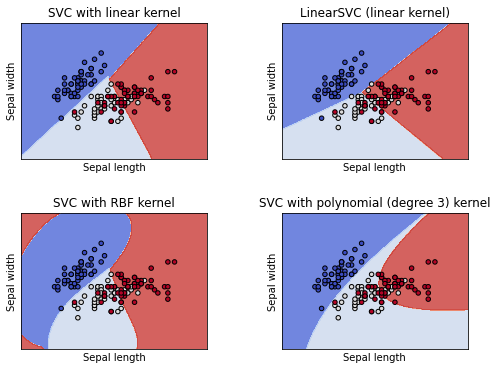

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2,figsize=(8,6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

Secondly, a **Regression** example:

The model produced by support vector classification (as described above) depends only on a subset of the training data, because the cost function for building the model does not care about training points that lie beyond the margin. Analogously, the model produced by Support Vector Regression depends only on a subset of the training data, because the cost function ignores samples whose prediction is close to their target.

There are three different implementations of Support Vector Regression: SVR, NuSVR and LinearSVR. LinearSVR provides a faster implementation than SVR but only considers the linear kernel, while NuSVR implements a slightly different formulation than SVR and LinearSVR.

**1.2 Support Vector Regression (SVR) using linear and non-linear kernels**

Toy example of 1D regression using linear, polynomial and RBF kernels:

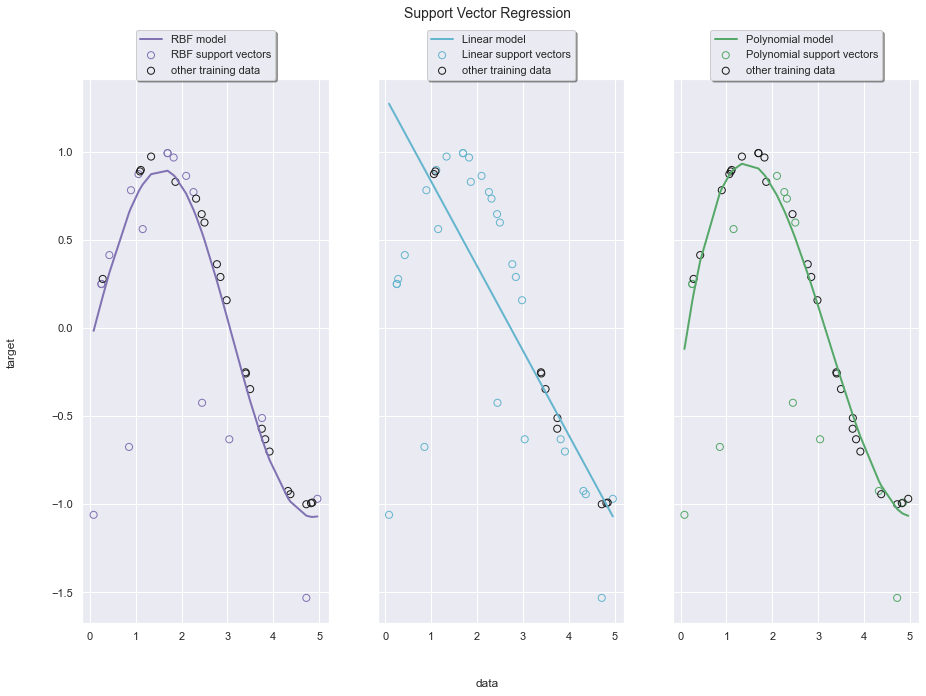

In [101]:
from sklearn.svm import SVR

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

Finally, **Density estimation, novelty(outliers) detection**:

Go to [2. One-class SVM with non-linear kernel (RBF)](#2.1) and [8. Outlier detection on a real data set.](#8.1) to detailed examples about this SVM use.

### 2. [One-class SVM with non-linear kernel (RBF).](https://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html) 
<a id='2.1'></a>

[One-class SVM](https://scikit-learn.org/stable/modules/svm.html#svm-outlier-detection) is an unsupervised algorithm that learns a decision function for novelty detection: classifying new data as similar or different to the training set.

Many applications require being able to decide whether a new observation belongs to the same distribution as existing observations (it is an inlier), or should be considered as different (it is an outlier). Often, this ability is used to clean real data sets. Two important distinctions must be made (we're going to focus only on novelty detection):

- **Novelty detection:** The training data is not polluted by outliers and we are interested in detecting whether a new observation is an outlier. In this context an outlier is also called a novelty. In the context of novelty detection, novelties/anomalies can form a dense cluster as long as they are in a low density region of the training data, considered as normal in this context.

Consider a data set of $n$ observations from the same distribution described by $p$ features. Consider now that we add one more observation to that data set. Is the new observation so different from the others that we can doubt it is regular? (i.e. does it come from the same distribution?) Or on the contrary, is it so similar to the other that we cannot distinguish it from the original observations? This is the question addressed by the novelty detection tools and methods.

In general, it is about to learn a rough, close frontier delimiting the contour of the initial observations distribution, plotted in embedding $p$-dimensional space. Then, if further observations lay within the frontier-delimited subspace, they are considered as coming from the same population than the initial observations. Otherwise, if they lay outside the frontier, we can say that they are abnormal with a given confidence in our assessment.

The One-Class SVM has been introduced by Schölkopf et al. for that purpose and implemented in the Support Vector Machines module in the [svm.OneClassSVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html#sklearn.svm.OneClassSVM) object. It requires the choice of a kernel and a scalar parameter to define a frontier. The RBF kernel is usually chosen although there exists no exact formula or algorithm to set its bandwidth parameter. This is the default in the scikit-learn implementation. The `nu` parameter, also known as the margin of the One-Class SVM, corresponds to the probability of finding a new, but regular, observation outside the frontier.

Now to the example:

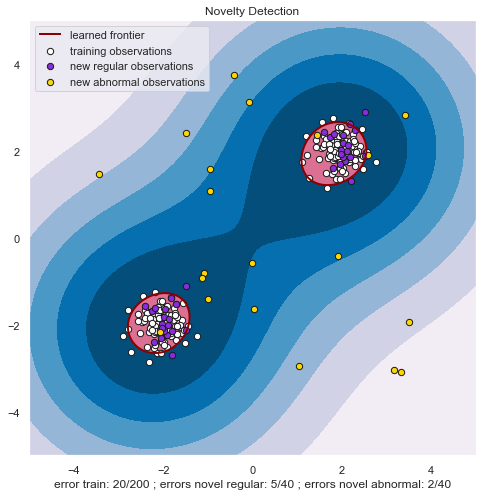

In [80]:
import matplotlib.font_manager

xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers)
)

plt.show()

As we observe, SVM can be used to know if a new point from a Dataset is, in fact, an Outlier. This is a very powerfull tool to discard immediately points that causes distorsions in our model and make it's prediction cappacity to decrease. Also, can be used to study this novelty point in order to detect some problems in our data collection, instruments, manual inputs, etc. and correct it quicker (better and quicker troubleshooting).

### 3. [SVM Margins Example.](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html) 

Support Vector Classifier is an extension of the Maximal Margin Classifier. It is less sensitive to individual data. Since it allows certain data to be misclassified, it’s also known as the “Soft Margin Classifier”. It creates a budget under which the misclassification allowance is granted.

The margin widens as the budget for misclassification increases, while the margin narrows as the budget decreases.

While building the model, we use a hyperparameter called “Cost”. Here Cost is inverse of budget means when the budget increases —> Cost decreases and vice versa. It is denoted by `“C”`.

The plots below illustrate the effect the parameter `C` has on the separation line. A large value of `C` basically tells our model that we do not have that much faith in our data’s distribution, and will only consider points close to line of separation.

A small value of `C` includes more/all the observations, allowing the margins to be calculated using all the data in the area.

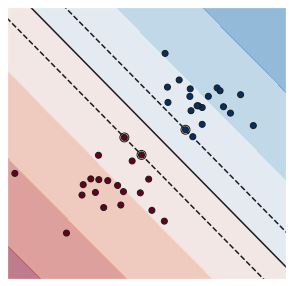

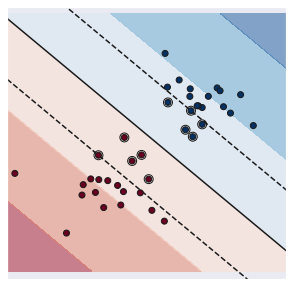

In [82]:
from matplotlib import cm

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# figure number
fignum = 1

# fit the model
for name, penalty in (("unreg", 1), ("reg", 0.05)):

    clf = svm.SVC(kernel="linear", C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(5, 5))
    plt.clf()
    plt.plot(xx, yy, "k-")
    plt.plot(xx, yy_down, "k--")
    plt.plot(xx, yy_up, "k--")

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
        cmap=cm.get_cmap("RdBu"),
    )
    plt.scatter(
        X[:, 0], X[:, 1], c=Y, zorder=10, cmap=cm.get_cmap("RdBu"), edgecolors="k"
    )

    plt.axis("tight")
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Put the result into a contour plot
    plt.contourf(XX, YY, Z, cmap=cm.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

Summarizing:

- Small `C` Value —-> Large Budget —–> Wide Margin ——> Allows more misclassification
- Large `C` Value —-> Small Budget —–> Narrow Margin ——> Allows less misclassification

With this in mind, optimizing the `C` hyperparameter to avoid overfitting is key in SVC problems.

### 4. [Non-linear SVM.](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html#non-linear-svm)

What Kernel Trick does is it utilizes existing features, applies some transformations, and creates new features. Those new features are the key for SVM to find the nonlinear decision boundary.

When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: `C` and `gamma`. The parameter `C`, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. `gamma` defines how much influence a single training example has. The larger `gamma` is, the closer other examples must be to be affected.

Proper choice of `C` and `gamma` is critical to the SVM’s performance (optimization hyperparameter technic). One is advised to use GridSearchCV with C and gamma spaced exponentially far apart to choose good values.

Perform binary classification using non-linear SVC with RBF kernel. The target to predict is a XOR of the inputs.

The color map illustrates the decision function learned by the SVC:

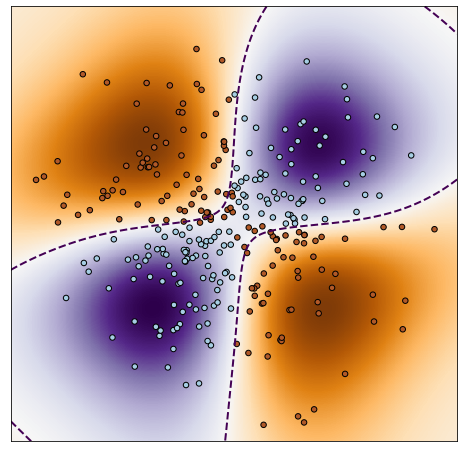

In [59]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC(gamma="auto")
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

In the linearly separable case, SVM is trying to find the hyperplane that maximizes the margin, with the condition that both classes are classified correctly. But in reality, **datasets are probably never linearly separable**, so the condition of 100% correctly classified by a hyperplane will never be met. This is the main reason to use a non-linear kernel.

### 5. [SVM Tie Breaking Example.](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_tie_breaking.html) 

Tie breaking is costly if `decision_function_shape='ovr'`, and therefore it is not enabled by default. This example illustrates the effect of the `break_ties` parameter for a multiclass classification problem and `decision_function_shape='ovr'`.

The two plots differ only in the area in the middle where the classes are tied. If `break_ties=False`, all input in that area would be classified as one class, whereas if `break_ties=True`, the tie-breaking mechanism will create a non-convex decision boundary in that area:

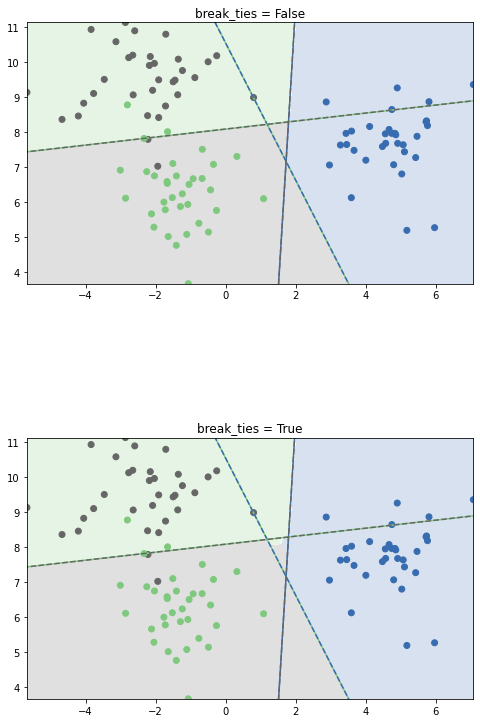

In [60]:
# Code source: Andreas Mueller, Adrin Jalali
# License: BSD 3 clause

from sklearn.datasets import make_blobs
from sklearn.svm import SVC

X, y = make_blobs(random_state=27)

fig, sub = plt.subplots(2, 1, figsize=(8, 14))
titles = ("break_ties = False", "break_ties = True")

for break_ties, title, ax in zip((False, True), titles, sub.flatten()):

    svm = SVC(
        kernel="linear", C=1, break_ties=break_ties, decision_function_shape="ovr"
    ).fit(X, y)

    xlim = [X[:, 0].min(), X[:, 0].max()]
    ylim = [X[:, 1].min(), X[:, 1].max()]

    xs = np.linspace(xlim[0], xlim[1], 1000)
    ys = np.linspace(ylim[0], ylim[1], 1000)
    xx, yy = np.meshgrid(xs, ys)

    pred = svm.predict(np.c_[xx.ravel(), yy.ravel()])

    colors = [plt.cm.Accent(i) for i in [0, 4, 7]]

    points = ax.scatter(X[:, 0], X[:, 1], c=y, cmap="Accent")
    classes = [(0, 1), (0, 2), (1, 2)]
    line = np.linspace(X[:, 1].min() - 5, X[:, 1].max() + 5)
    ax.imshow(
        -pred.reshape(xx.shape),
        cmap="Accent",
        alpha=0.2,
        extent=(xlim[0], xlim[1], ylim[1], ylim[0]),
    )

    for coef, intercept, col in zip(svm.coef_, svm.intercept_, classes):
        line2 = -(line * coef[1] + intercept) / coef[0]
        ax.plot(line2, line, "-", c=colors[col[0]])
        ax.plot(line2, line, "--", c=colors[col[1]])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_title(title)
    ax.set_aspect("equal")

plt.show()

The use of Tie-braker will depend on on how exact we want input classification to be done.

### 6. [SVM: Separating hyperplane for unbalanced classes.](https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html)

Although effective, SVMs perform poorly when there is a severe skew in the class distribution. As such, there are many extensions to the algorithm in order to make them more effective on imbalanced datasets

The C parameter is used as a penalty during the fit of the model, specifically the finding of the decision boundary. By default, each class has the same weighting, which means that the softness of the margin is symmetrical.

Given that there are significantly more examples in the majority class than the minority class, it means that the soft margin and, in turn, the decision boundary will favor the majority class.

Perhaps the simplest and most common extension to SVM for imbalanced classification is to weight the C value in proportion to the importance of each class.

Specifically, each example in the training dataset has its own penalty term (C value) used in the calculation for the margin when fitting the SVM model. The value of an example’s C-value can be calculated as a weighting of the global C-value, where the weight is defined proportional to the class distribution.

* C_i = weight_i * C

A larger weighting can be used for the minority class, allowing the margin to be softer, whereas a smaller weighting can be used for the majority class, forcing the margin to be harder and preventing misclassified examples.

* Small Weight: Smaller C value, larger penalty for misclassified examples.
* Larger Weight: Larger C value, smaller penalty for misclassified examples.

This has the effect of encouraging the margin to contain the majority class with less flexibility, but allow the minority class to be flexible with misclassification of majority class examples onto the minority class side if needed.

This said, for our example lets find the optimal separating hyperplane using an SVC for classes that are unbalanced.

We first find the separating plane with a plain SVC and then plot (dashed) the separating hyperplane with automatically correction for unbalanced classes:

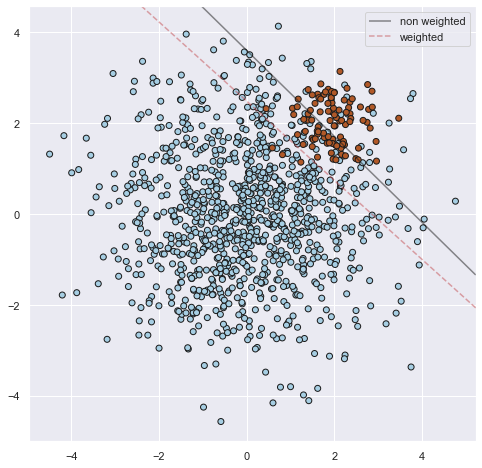

In [98]:
# we create two clusters of random points
from sklearn import svm

n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(
    n_samples=[n_samples_1, n_samples_2],
    centers=centers,
    cluster_std=clusters_std,
    random_state=0,
    shuffle=False,
)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel="linear", class_weight={1: 10})
wclf.fit(X, y)

# plot the samples
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z, colors="k", levels=[0], alpha=0.5, linestyles=['-'])

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors="r", levels=[0], alpha=0.5, linestyles=["dashed"])

plt.legend(
    [a.collections[0], b.collections[0]],
    ["non weighted", "weighted"],
    loc="upper right",
)
plt.show()

When correction for unbalanced classes its done, our classifier performs better for minority class.

### 7. [SVM: Weighted samples.](https://scikit-learn.org/stable/auto_examples/svm/plot_weighted_samples.html)

Plot decision function of a weighted dataset, where the size of points is proportional to its weight.

The sample weighting rescales the C parameter, which means that the classifier puts more emphasis on getting these points right. The effect might often be subtle. To emphasize the effect here, we particularly weight outliers, making the deformation of the decision boundary very visible:

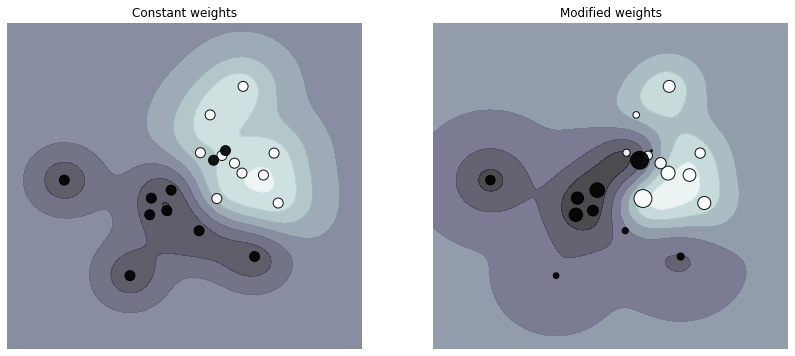

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        s=100 * sample_weight,
        alpha=0.9,
        cmap=plt.cm.bone,
        edgecolors="black",
    )

    axis.axis("off")
    axis.set_title(title)


# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

# for reference, first fit without sample weights

# fit the model
clf_weights = svm.SVC(gamma=1)
clf_weights.fit(X, y, sample_weight=sample_weight_last_ten)

clf_no_weights = svm.SVC(gamma=1)
clf_no_weights.fit(X, y)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(
    clf_no_weights, sample_weight_constant, axes[0], "Constant weights"
)
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1], "Modified weights")

plt.show()

It's usually assume that classs weight is uniform in any dataset. As we saw on the example, when weights are modified boundaries also are and classification will improve, but, if we not have any information about our dataset how to determine weights on observations? Well, follow example uses SVM to find outliers that may be acting as leverage points.

### 8. [Outlier detection on a real data set.](https://scikit-learn.org/stable/auto_examples/applications/plot_outlier_detection_wine.html)
<a id='8.1'></a>

When modeling one class, the algorithm captures the density of the majority class and classifies examples on the extremes of the density function as outliers.

The main difference from a standard SVM is that it is fit in an unsupervised manner and does not provide the normal hyperparameters for tuning the margin like `C`. Instead, it provides a hyperparameter `nu` that controls the sensitivity of the support vectors and should be tuned to the approximate ratio of outliers in the data, e.g. 0.01%.

This example illustrates the need for robust covariance estimation on a real data set. It is useful both for outlier detection and for a better understanding of the data structure.

In both examples below, the main result is that the empirical covariance estimate, as a non-robust one, is highly influenced by the heterogeneous structure of the observations. Although the robust covariance estimate is able to focus on the main mode of the data distribution, it sticks to the assumption that the data should be Gaussian distributed, yielding some biased estimation of the data structure, but yet accurate to some extent. The One-Class SVM does not assume any parametric form of the data distribution and can therefore model the complex shape of the data much better.

##### **First example:**

The first example illustrates how the Minimum Covariance Determinant robust estimator can help concentrate on a relevant cluster when outlying points exist. Here the empirical covariance estimation is skewed by points outside of the main cluster. Of course, some screening tools would have pointed out the presence of two clusters (Support Vector Machines, Gaussian Mixture Models, univariate outlier detection, …). But had it been a high-dimensional example, none of these could be applied that easily:

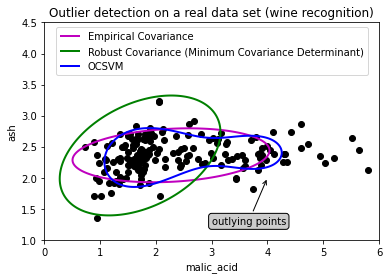

In [53]:
# Author: Virgile Fritsch <virgile.fritsch@inria.fr>
# License: BSD 3 clause

from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.font_manager
from sklearn.datasets import load_wine

# Define "classifiers" to be used
classifiers = {
    "Empirical Covariance": EllipticEnvelope(support_fraction=1.0, contamination=0.25),
    "Robust Covariance (Minimum Covariance Determinant)": EllipticEnvelope(
        contamination=0.25
    ),
    "OCSVM": OneClassSVM(nu=0.25, gamma=0.35),
}
colors = ["m", "g", "b"]
legend1 = {}
legend2 = {}

# Get data
X1 = load_wine()["data"][:, [1, 2]]  # two clusters

# Learn a frontier for outlier detection with several classifiers
xx1, yy1 = np.meshgrid(np.linspace(0, 6, 500), np.linspace(1, 4.5, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(1)
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i]
    )

legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(1)  # two clusters
plt.title("Outlier detection on a real data set (wine recognition)")
plt.scatter(X1[:, 0], X1[:, 1], color="black")
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.annotate(
    "outlying points",
    xy=(4, 2),
    xycoords="data",
    textcoords="data",
    xytext=(3, 1.25),
    bbox=bbox_args,
    arrowprops=arrow_args,
)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend(
    (
        legend1_values_list[0].collections[0],
        legend1_values_list[1].collections[0],
        legend1_values_list[2].collections[0],
    ),
    (legend1_keys_list[0], legend1_keys_list[1], legend1_keys_list[2]),
    loc="upper center",
    prop=matplotlib.font_manager.FontProperties(size=10),
)
plt.ylabel("ash")
plt.xlabel("malic_acid")

plt.show()

##### **Second example:**

The second example shows the ability of the Minimum Covariance Determinant robust estimator of covariance to concentrate on the main mode of the data distribution: the location seems to be well estimated, although the covariance is hard to estimate due to the banana-shaped distribution. Anyway, we can get rid of some outlying observations. The One-Class SVM is able to capture the real data structure, but the difficulty is to adjust its kernel bandwidth parameter so as to obtain a good compromise between the shape of the data scatter matrix and the risk of over-fitting the data:

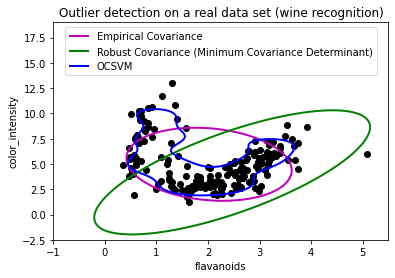

In [56]:
# Get data
X2 = load_wine()["data"][:, [6, 9]]  # "banana"-shaped

# Learn a frontier for outlier detection with several classifiers
xx2, yy2 = np.meshgrid(np.linspace(-1, 5.5, 500), np.linspace(-2.5, 19, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    plt.figure(2)
    clf.fit(X2)
    Z2 = clf.decision_function(np.c_[xx2.ravel(), yy2.ravel()])
    Z2 = Z2.reshape(xx2.shape)
    legend2[clf_name] = plt.contour(
        xx2, yy2, Z2, levels=[0], linewidths=2, colors=colors[i]
    )

legend2_values_list = list(legend2.values())
legend2_keys_list = list(legend2.keys())

# Plot the results (= shape of the data points cloud)
plt.figure(2)  # "banana" shape
plt.title("Outlier detection on a real data set (wine recognition)")
plt.scatter(X2[:, 0], X2[:, 1], color="black")
plt.xlim((xx2.min(), xx2.max()))
plt.ylim((yy2.min(), yy2.max()))
plt.legend(
    (
        legend2_values_list[0].collections[0],
        legend2_values_list[1].collections[0],
        legend2_values_list[2].collections[0],
    ),
    (legend2_keys_list[0], legend2_keys_list[1], legend2_keys_list[2]),
    loc="upper center",
    prop=matplotlib.font_manager.FontProperties(size=10),
)
plt.ylabel("color_intensity")
plt.xlabel("flavanoids")

plt.show()

Both examples **shows that OCSVM fits better for data distributions that doesn't follow Gaussian distribution**. It is unusual to have such well-behaved data, so robust covariance method or empirical covariance may not be the best estimator to set boundaries to inliers and outliers. This is the main reason to use OCSVM to detect outliers.

### 9. [Plot different SVM classifiers in the iris dataset.](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html)

Go to [1.1 Plot different SVM classifiers in the iris dataset](#1.1) to see this example.

## Problem 2: Application Case

Read and reproduce carefully the example [In-Depth: Support Vector Machines](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html) from the book of VanderPlas, then complete
the mathematical deductions and code descriptions.Upload your results to [Github](https://github.com/) in the form of a [Jupyter](https://jupyter.org/) note-book, then make it interactive using [Binder](https://mybinder.org/), hence submit your results through both links. The use of [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb) is highly recommended.

### Example: Face Recognition

As an example of support vector machines in action, let's take a look at the facial recognition problem. We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures. A fetcher for the dataset is built into Scikit-Learn:

In [65]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Let's plot a few of these faces to see what we're working with:

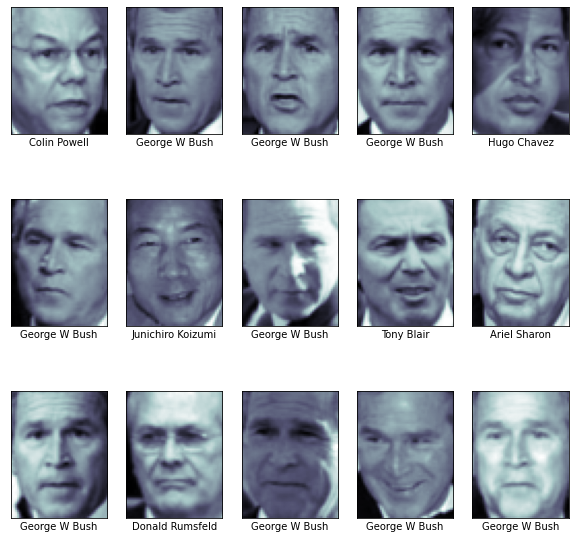

In [67]:
fig, ax = plt.subplots(3, 5, figsize = (10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Each image contains [62×47] or nearly 3,000 pixels. We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here we will use a principal component analysis (PCA analysis) to extract 150 fundamental components to feed into our support vector machine classifier. We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline:

In [69]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

Split the data into a training and testing set:

In [71]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

Finally, we can use a grid search cross-validation to explore combinations of parameters. Here we will adjust `C` (which controls the margin hardness) and `gamma` (which controls the size of the radial basis function kernel), and determine the best model:

In [73]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 37.6 s
{'svc__C': 10, 'svc__gamma': 0.001}


The optimal values fall toward the middle of our grid; if they fell at the edges, we would want to expand the grid to make sure we have found the true optimum.

Now with this cross-validated model, we can predict the labels for the test data, which the model has not yet seen:

In [74]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Let's take a look at a few of the test images along with their predicted values:

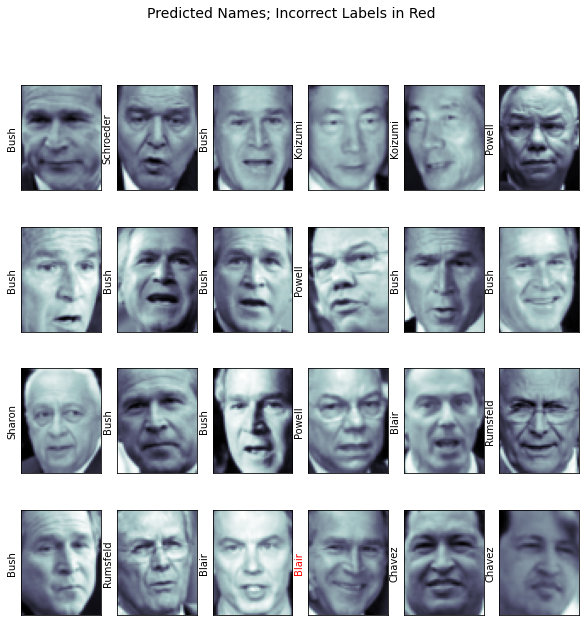

In [75]:
fig, ax = plt.subplots(4, 6, figsize = (10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

Out of this small sample, our optimal estimator mislabeled only a single face (Bush’s face in the bottom row was mislabeled as Blair). We can get a better sense of our estimator's performance using the classification report, which lists recovery statistics label by label:

In [76]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



We might also display the confusion matrix between these classes:

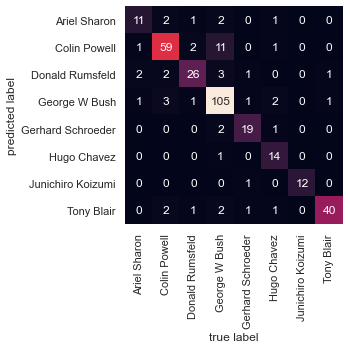

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

`SVC` offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. It is known for its **kernel trick to handle nonlinear input spaces**. It is used in a variety of applications such as face detection (as we saw in this example), intrusion detection, classification of emails, news articles and web pages, classification of genes, and handwriting recognition. 1/20 mistakes proves that all the math that we studied (and suffered) during this course has a reason to be.